In [1316]:
Der(state_array,1,4,initX)

LoadError: BoundsError: attempt to access 4007×5 Matrix{Float64} at index [0, 4]

# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [434]:
# Parameters
m = 3

3

In [435]:
res=m;
N=2.0^m*500.0;#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx*0.4,digits=10);
Nt=100.0*2^m*10
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 0.8


In [436]:
print(N)

4000.0

In [437]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

println("epsilon = dx/dt * (1/2)^(2) = ", dx/dt*(1/2)^(2))

dx =0.00025
dt =0.0001
dx/dt =2.5
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.3125
epsilon = dx/dt * (1/2)^(2*2) = 0.15625
epsilon = dx/dt * (1/2)^(2*3) = 0.0390625
epsilon = dx/dt * (1/2)^(2) = 0.625


In [438]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res$res"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3"

In [439]:
println(dx)
println(dt)

0.00025
0.0001


In [440]:
epsilon=0.1##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)

0.1

# Grid

In [441]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [442]:
print(dx)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)

0.00025step size is  0.00025
the time step is 0.0001


In [443]:
radius=zeros(L)
print(L)
print(size(initX1))
print(initX1[1001])
for i in 1:L
    radius[i]=initX[i]/(1-initX[i])
end


4007(4001,)0.25

In [444]:
include("./ScalarField.jl");

In [445]:
using Interpolations

# Initial data of m β Ψ and Ψ,x

In [446]:
using PyCall   


scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")


####

initphi=zeros(L);
initphibar=zeros(L);

#PHI,X

r0=0.7#0.3
sigma=0.3
A=0.1449
initphibar[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)



#PHI FROM PSI,X
spl = scipyinterpolate.splrep(initX[4:L-3], initphibar[4:L-3],k=5)
phi0=0
SFconstraint_phi(phi0,x) = scipyinterpolate.splev(x, spl)
initphi[4:L-3], psi_ks = rungekutta4(SFconstraint_phi,phi0,initX1) 


#PHI
"initphi = init_gaussian(R,r0,sigma,A)"




"initphi = init_gaussian(R,r0,sigma,A)"

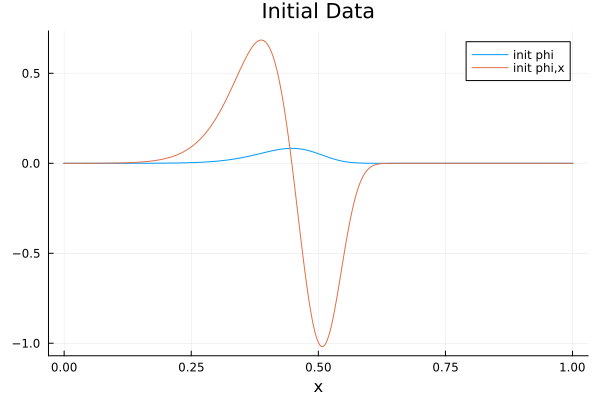

In [447]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX, [initphi initphibar], xaxis="x",title="Initial Data", labels=["init phi" "init phi,x"])

In [448]:
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initpsibar=zeros(L);
state_array=[initm initbeta initpsi initpsibar initX];


#PSI
"initpsi = initphi .* initX ./ (1 .- initX)
initpsi[L-3]=0
state_array[:,3]=initpsi;
state_array=ghost(state_array);"


#PSI,X
initpsibar = initphibar .* initX ./ (1 .- initX) +  initphi ./ (1 .- initX) .^2
initpsibar[L-3]=0
state_array[:,4]=initpsibar;
state_array=ghost(state_array);

spl_derpsi = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,4],k=4)
derpsi_func(x) = scipyinterpolate.splev(x, spl_derpsi)
"""println(derpsi_func(0.1)[1])
println(derpsi_func(0.1))"""

#### PSI from PSI,X
spl = scipyinterpolate.splrep(initX[4:L-3], initpsibar[4:L-3],k=4)
psi0=0
SFconstraint_psi(psi0,x) = scipyinterpolate.splev(x, spl)
initpsi[4:L-3], psi_ks = rungekutta4(SFconstraint_psi,psi0,initX1)
state_array[:,3]=initpsi;
state_array=ghost(state_array);


psi_double_data = rungekutta4(SFconstraint_psi,psi0,doublegrid(initX1))[1]


#BETA
beta0=0
initbeta[4:L-3]=rk4wrapper(SFconstraint_beta,beta0,initX1,0,derpsi_func,psi_double_data)
state_array[:,2]=initbeta;
state_array=ghost(state_array);


#M
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,initX1,0,derpsi_func,psi_double_data)
state_array[:,1]=initm;
state_array=ghost(state_array);


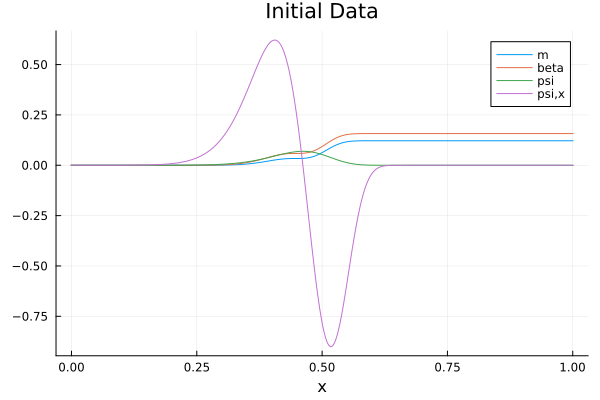

In [449]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX, state_array[:,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [450]:
using CSV, Tables
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3/time_step0.csv"

 ## Time evolution

fixed grid

In [451]:
using Interpolations
using ProgressMeter
@showprogress for k in 1:10#length(T)

    #evolve psi,x ghost points
    state_array=rungekutta4molstep(GP_RHS,state_array,T,k,0,derpsi_func) #evolve psi,x
    
    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0,derpsi_func) #evolve psi,x
    state_array=ghost(state_array)
    
"    X=state_array[:,5]
    X1=X[4:L-3]
    
    #calculate psi from psi,x
    psi0=0
    spl_derpsi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,4],k=4)
    SFconstraint_psi(psi0,x) = scipyinterpolate.splev(x, spl_derpsi)
    
    state_array[4:L-3,3],psi_ks = rungekutta4(SFconstraint_psi,psi0,X1)
    state_array=ghost(state_array);

    psi_double_data = rungekutta4(SFconstraint_psi,psi0,doublegrid(initX1))[1]   
    
    #evolve beta
    beta0=0
    state_array[4:L-3,2]=rk4wrapper(SFconstraint_beta,beta0,X1,0,derpsi_func,psi_double_data)
    state_array=ghost(state_array)
    
    #evolve m
    m0=0
    state_array[4:L-3,1]=rk4wrapper(SFconstraint_m,m0,X1,0,derpsi_func,psi_double_data)
    state_array=ghost(state_array)
    "
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=40

Progress:  20%|████████▎                                |  ETA: 0:00:45

Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=40

Progress:  30%|████████████▎                            |  ETA: 0:00:36

Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=40

Progress:  40%|████████████████▍                        |  ETA: 0:00:29

Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=40

Progress:  50%|████████████████████▌                    |  ETA: 0:00:23

Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=40

Progress:  60%|████████████████████████▋                |  ETA: 0:00:18

Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=40

Progress:  70%|████████████████████████████▊            |  ETA: 0:00:13

4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:08

4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:04

4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
Der!, i=4005
DDer!, i=4005
DDer!, i=4005
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
Der!, i=4006
DDer!, i=4006
DDer!, i=4006
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
Der!, i=4007
DDer!, i=4007
DDer!, i=4007
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
Der!, i=1
DDer!, i=1
DDer!, i=1
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
Der!, i=2
DDer!, i=2
DDer!, i=2
Der!,

Progress: 100%|█████████████████████████████████████████| Time: 0:00:41


4007
DDer!, i=4007
DDer!, i=4007


In [352]:
state_array[:,4]

1007-element Vector{Float64}:
  1.5486091987962603e-8
  7.080050411009856e-9
  1.818179391447013e-9
  0.0
  1.925033307394743e-9
  7.892800384357168e-9
  1.8202822301613203e-8
  3.3169094212541644e-8
  5.312066070217535e-8
  7.84022114953055e-8
  1.0937469818884927e-7
  1.464159726900681e-7
  1.8992144806426074e-7
  ⋮
 -1.297499774789627e-11
 -1.6946935833986963e-11
 -2.3066662662926702e-11
 -3.321599423461445e-11
 -5.189999099158508e-11
 -9.226665065170681e-11
 -2.0759996396634033e-10
 -8.303998558653613e-10
  0.0
  4.244265929978513e-9
  1.3863064260418947e-8
  3.081706131767007e-8

In [353]:
y = state_array
X = state_array[:,5]

for i in 1:L
    println(i," ", Der(y,i,4,X))
end

Der!, i=1
1 -9.771500809405538e-6


LoadError: BoundsError: attempt to access 1007×5 Matrix{Float64} at index [0, 4]

In [29]:
y = state_array
X = state_array[:,5]

for i in 5:L-3
    println(i," ", DDer(y,i,3,X))
end

5 3.922036735066311e-6
6 8.087776969154229e-6
7 1.2584574880804493e-5
8 1.7402787848258285e-5
9 2.2557769541749108e-5
10 2.8065466377657186e-5
11 3.3942457046341455e-5
12 4.0205968026530136e-5
13 4.687389871610019e-5
14 5.396484408131265e-5
15 6.1498119225514e-5
16 6.949378431760786e-5
17 7.797267047533093e-5
18 8.69564064206236e-5
19 9.646744600628806e-5
20 0.00010652909661220143
21 0.00011716554844669718
22 0.0001284019047762197
23 0.0001402642131118107
24 0.00015277949738005093
25 0.000165975791107398
26 0.00017988217164739736
27 0.0001945287954812493
28 0.00020994693462264924
29 0.00022616901415918638
30 0.00024322865096282817
31 0.0002611606936033289
32 0.00028000126349902045
33 0.0002997877973404858
34 0.00032055909082346956
35 0.00034235534372822093
36 0.00036521820638369464
37 0.00038919082755563495
38 0.00041431790379896024
39 0.00044064573031543365
40 0.00046822225335922717
41 0.0004970971242334325
42 0.0005273217549220777
43 0.0005589493754029388
44 0.0005920350926883987
45 

690 3.429992102005512e-6
691 2.553892973356197e-6
692 1.8931402136058024e-6
693 1.3970286532955169e-6
694 1.0262229591453347e-6
695 7.503483782345606e-7
696 5.46058774496606e-7
697 3.9549494485891146e-7
698 2.850604292193869e-7
699 2.0445426790164066e-7
700 1.4591062252309694e-7
701 1.036040626457363e-7
702 7.318682092103602e-8
703 5.1430610147693304e-8
704 3.59508387899992e-8
705 2.4995404192821915e-8
706 1.728381713280371e-8
707 1.188533498090065e-8
708 8.127157106774303e-9
709 5.5256555312806376e-9
710 3.735154320483634e-9
711 2.509999763805083e-9
712 1.6766369061952362e-9
713 1.1131744958932796e-9
714 7.345199952583411e-10
715 4.816322732092515e-10
716 3.1379935325619063e-10
717 2.0312450421098884e-10
718 1.3061415831578567e-10
719 8.342019624306088e-11
720 5.290867461373049e-11
721 3.3316290430854656e-11
722 2.0822004758263904e-11
723 1.2909917001168576e-11
724 7.93504631487833e-12
725 4.829479402982515e-12
726 2.904927921720178e-12
727 1.7210249976170148e-12
728 9.98118434297167e

1004 fill(-1.72294546436755e-8)


In [1648]:
state_array[:,4]

4007-element Vector{Float64}:
 -6.510143049052199e-8
 -3.0231037195509647e-8
 -9.855754453477806e-9
  0.0
  3.3118084293502337e-9
  4.05525309899936e-9
  6.205916273373841e-9
  7.773882523859078e-9
  1.0114490197538904e-8
  1.2454855212768007e-8
  1.5215203030880247e-8
  1.8197023950857248e-8
  2.149753545676466e-8
  ⋮
 -3.7027888332063666e-11
 -1.1444949991453733e-10
 -3.3224281977537283e-10
 -5.889244257860449e-10
  3.8807381205767846e-11
  4.200002330954657e-9
  1.6762962527504585e-8
  4.4658272257260565e-8
  9.658311714823708e-8
  1.812346828284486e-7
  3.073101549259096e-7
  4.835067190686346e-7

In [201]:
for i in 4:L-3
    print(X[i], " ", i, "    ")
end

0.0 4    0.001 5    0.002 6    0.003 7    0.004 8    0.005 9    0.006 10    0.007 11    0.008 12    0.009 13    0.01 14    0.011 15    0.012 16    0.013 17    0.014 18    0.015 19    0.016 20    0.017 21    0.018 22    0.019 23    0.02 24    0.021 25    0.022 26    0.023 27    0.024 28    0.025 29    0.026 30    0.027 31    0.028 32    0.029 33    0.03 34    0.031 35    0.032 36    0.033 37    0.034 38    0.035 39    0.036 40    0.037 41    0.038 42    0.039 43    0.04 44    0.041 45    0.042 46    0.043 47    0.044 48    0.045 49    0.046 50    0.047 51    0.048 52    0.049 53    0.05 54    0.051 55    0.052 56    0.053 57    0.054 58    0.055 59    0.056 60    0.057 61    0.058 62    0.059 63    0.06 64    0.061 65    0.062 66    0.063 67    0.064 68    0.065 69    0.066 70    0.067 71    0.068 72    0.069 73    0.07 74    0.071 75    0.072 76    0.073 77    0.074 78    0.075 79    0.076 80    0.077 81    0.078 82    0.079 83    0.08 84    0.081 85    0.082 86    0.083 87    0.084 88

806    0.803 807    0.804 808    0.805 809    0.806 810    0.807 811    0.808 812    0.809 813    0.81 814    0.811 815    0.812 816    0.813 817    0.814 818    0.815 819    0.816 820    0.817 821    0.818 822    0.819 823    0.82 824    0.821 825    0.822 826    0.823 827    0.824 828    0.825 829    0.826 830    0.827 831    0.828 832    0.829 833    0.83 834    0.831 835    0.832 836    0.833 837    0.834 838    0.835 839    0.836 840    0.837 841    0.838 842    0.839 843    0.84 844    0.841 845    0.842 846    0.843 847    0.844 848    0.845 849    0.846 850    0.847 851    0.848 852    0.849 853    0.85 854    0.851 855    0.852 856    0.853 857    0.854 858    0.855 859    0.856 860    0.857 861    0.858 862    0.859 863    0.86 864    0.861 865    0.862 866    0.863 867    0.864 868    0.865 869    0.866 870    0.867 871    0.868 872    0.869 873    0.87 874    0.871 875    0.872 876    0.873 877    0.874 878    0.875 879    0.876 880    0.877 881    0.878 882    0.879 883   

In [196]:
println(length(X[4:L-3]))
println(length(X))

1001
1007


changing grid

In [1132]:
"using Interpolations
using ProgressMeter
@showprogress for k in 1:length(T)

    #evolve grid
    X=update_grid(state_array,dx,T,k,spl_funcs)
    state_array[:,5]=X
    L=length(X)
    X1=X[4:L-3]
    
    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0,spl_funcs) #evolve psi,x
    state_array=ghost(state_array)
    
    X=state_array[:,5]
    X1=X[4:L-3]
    
    spl_derpsi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,4],k=4)
    derpsi_func(x) = scipyinterpolate.splev(x, spl_derpsi)
    spl_funcs[4] = derpsi_func
    
    #calculate psi form psi,x
    psi0=0
    SFconstraint_psi(psi0,x) = derpsi_func(x)
    state_array[4:L-3,3] = rungekutta4(SFconstraint_psi,psi0,X1)
    state_array=ghost(state_array);
    
    spl_psi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,3],k=4)
    psi_func(x) = scipyinterpolate.splev(x, spl_psi)
    spl_funcs[3] = psi_func
    
    #evolve beta
    beta0=0
    state_array[4:L-3,2]=rk4wrapper(SFconstraint_beta,beta0,X1,T,spl_funcs)
    state_array=ghost(state_array)
    
    spl_beta = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,2],k=4)
    beta_func(x) = scipyinterpolate.splev(x, spl_beta)
    spl_funcs[2] = beta_func
    
    #evolve m
    m0=0
    state_array[4:L-3,1]=m_rk4wrapper(SFconstraint_m,m0,X1,T,spl_funcs)
    state_array=ghost(state_array)
    
    spl_m = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,1],k=4)
    m_func(x) = scipyinterpolate.splev(x, spl_m)
    spl_funcs[1] = m_func
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end"

LoadError: LoadError: UndefVarError: k not defined
in expression starting at In[1132]:50

In [1023]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2

## Movie of the evolution

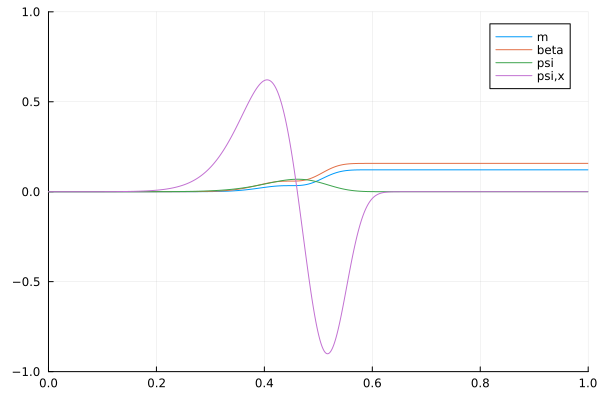

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res3.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res3.gif")
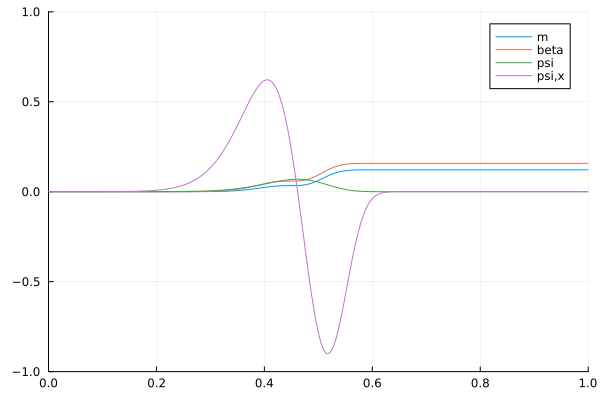

In [1003]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1:10#length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    d=round(T[n],digits=1)
    #plot!(X1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.1,0.1], xlim=[0, 0.1]) |> display 
    plot!(initX[4:L-3], [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1], xlim=[0, 1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 15)

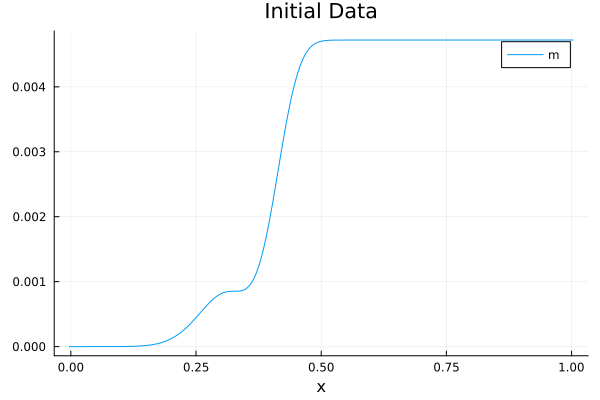

In [308]:
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,initX1,0,spl_funcs)
state_array[:,1]=initm;
state_array=ghost(state_array);

spl_m = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_func(x) = scipyinterpolate.splev(x, spl_m)
spl_funcs[1] = m_func

using Plots #showing initial data and the initial status of the horizon finder
plot(initX, ghost(initm), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

In [40]:
#monitor_ratio = 1-v/rexp(-2beta)
monitor_ratio = zeros(L)
for i in 1:L
    monitor_ratio = 2*state_array[:,1]/initX[i]*(1-initX[i])
    if monitor_ratio[i]>0.6
        print(monitor_ratio[i])
    end
end